![](../nci-logo.png)

-------
# Data Access and Manipulation Using iPython Notebooks
## Landsat 8 Example



### In this notebook:

- Using iPython Notebooks with NetCDF data within the VDI
    - <a href='#part1'>Launch Jupyter Notebook</a>  
    - <a href='#part2'>Importing Python libraries</a>  
    - <a href='#part3'>Opening/reading a file</a> 
    - <a href='#part4'>Browsing information about file contents</a> 
    - <a href='#part5'>Extracting data</a>
    - <a href='#part6'>Plotting data</a>
        - <a href='#part6a'>Simple plot</a>
        - <a href='#part6b'>RGB images</a>
    - <a href='#part7'>XArray package</a>


   
#### The following material uses Geoscience Australia's Landsat 8 Data Collection which is available under the Creative Commons License 4.0. For more information on the collection and licensing, please [click here](http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_8228_7170_1486). 


---------

<br>


<a id='part1'></a> 
## Launch the Jupyter Notebook application

#### Using pre-built VDI modules:

Load the `python`, `ipython`, and `netcdf4-python` modules:

```
    $ module load python/2.7.11
    $ module load python/2.7.11-matplotlib
    $ module load ipython/4.2.0-py2.7
    $ module load netcdf4-python/1.2.4-ncdf-4.3.3.1-py2.7
    $ module load xarray/0.7.2-py2.7
```    
    
<br>
Launch the Jupyter Notebook application:
```
    $ jupyter notebook
``` 

<div class="alert alert-info">
<b>NOTE: </b> This will launch the <b>Notebook Dashboard</b> within a new web browser window. 
</div>

<br>

#### Using virtual environments:

To use along with customised python packages in a virtual environment, begin by following the steps in **Python on the VDI: Part II**. 

Once you have a virtual environment setup with your packages (including `Jupyter`), proceed by loading the required modules and activating the virtual environment:

```
    $ module load python/2.7.11
    $ source <path_to_virtual_environment>/bin/activate
```

<br>
Then, as above, launch the Jupyter Notebook application:

```
    $ jupyter notebook
```    
    
<div class="alert alert-warning">
<b>NOTE: </b> If you have already followed <b>Python on the VDI: Part II</b>, you should have installed the netcdf4-python package, which is required in the remainder of this notebook.  
</div>

<br>


<br>


<a id='part2'></a>
## Import python libraries

There are several Python libraries available to work with netCDF and HDF file formats. This tutorial will use `netCDF4` but others, such as `h5py`, `cdms2`, and `gdal` can also be used. For more information on these other libraries, please see the main tutorial page. 

**Note:** Python's netCDF4 library has to be installed locally by user on Raijin and the VDI

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/pablo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<a id='part3'></a>
## Open/read file


### The `Dataset` function is used to open a file with Python's netCDF4 library. 
For local files, this will be the filepath (i.e., /g/data...) while for remote access, this will be the OPeNDAP data URL. Note that this does not yet load/extract any data, just opens the file.

#### 1. Accessing data locally (/g/data) 

In [2]:
path = '/g/data2/rs0/datacube/002/LS8_OLI_NBART/-10_-28/LS8_OLI_NBART_3577_-10_-28_2013_v1493805443.nc'

#### 2. Accessing data remotely (OPeNDAP)

In [3]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rs0/datacube/002/LS8_OLI_NBART/-10_-28/LS8_OLI_NBART_3577_-10_-28_2013_v1493805443.nc'

#### 3. Either the 'path' or the 'url' can be used now to open the file 
Comment/uncomment the access method you would like to use here.

In [4]:
f = Dataset(path, 'r')

In [6]:
# OR using the URL

f = Dataset(url, 'r')

#### After opening the file with the OPeNDAP address, the file can be handled in the same manner as a local file. 

<a id='part4'></a>
## Browse information about the file

### File dimensions

In [7]:
for item in f.dimensions:
    print f.dimensions[item].name, f.dimensions[item].size

maxStrlen64 64
time 61
x 4000
y 4000


### File variables

In [8]:
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	y
Dimensions: 	(u'y',)
Shape:    	(4000,) 

Variable: 	x
Dimensions: 	(u'x',)
Shape:    	(4000,) 

Variable: 	time
Dimensions: 	(u'time',)
Shape:    	(61,) 

Variable: 	crs
Dimensions: 	()
Shape:    	() 

Variable: 	extra_metadata
Dimensions: 	(u'time', u'maxStrlen64')
Shape:    	(61, 64) 

Variable: 	band_6
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_7
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_4
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_5
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_2
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_3
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 

Variable: 	band_1
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(61, 4000, 4000) 



<a id='part5'></a>
## Extracting data (using index values)
A nice feature of netCDF/HDF file formats is that you can extract subsets without having to read the entire file (or variable). The example below demonstrates the simplest subsetting example by directly specifying the subset indices. 

In [9]:
# Read variables (but not yet extract)
band2 = f['swir1']
y = f['y']
x = f['x']
t = f['time']

In [32]:
# Subset indices
x1, x2 = 1000,3999
y1, y2 = 0,3000
t1 = 9

In [11]:
%%time

# Extract
band2_subset = band2[t1, y1:y2, x1:x2]
y_subset = y[y1:y2]
x_subset = x[x1:x2]

CPU times: user 869 ms, sys: 117 ms, total: 986 ms
Wall time: 1.77 s


<a id='part6'></a>
## Plot data

<a id='part6a'></a>
### Simple plot

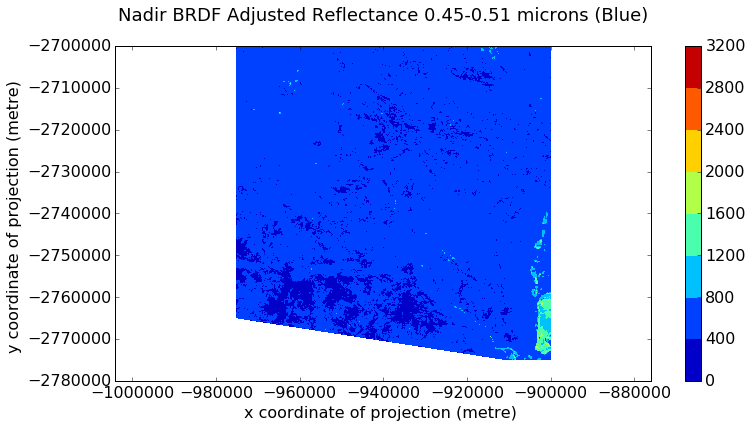

In [12]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(x_subset, y_subset, band2_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(band2.long_name+'\n', fontsize=18)
plt.xlabel(x.long_name+' ('+x.units+') ', fontsize=16)
plt.ylabel(y.long_name+' ('+y.units+') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


<a id='part6b'></a>
### Plot subset as RGB image
For more info on common band combinations: http://landsat.usgs.gov/L8_band_combos.php

#### Read in bands
**Note**: Bands must be clipped (value of 3000 was chosen in this case) and scaled to values between (0, 255) to plot as RGB image.

In [13]:
import numpy as np

In [14]:
band4_subset = f['blue'][t1, y1:y2, x1:x2]
band6_subset = f['green'][t1, y1:y2, x1:x2]
band7_subset = f['red'][t1, y1:y2, x1:x2]

In [15]:
b4 = band4_subset.clip(0, 3000) / 6000. * 255
b6 = band6_subset.clip(0, 3000) / 3000. * 255
b7 = band7_subset.clip(0, 3000) / 3000. * 255

#### Combine the bands of interest into numpy NxNx3 dimensional array
**Note**: The data type must be converted to 'uint8' to plot as image

In [16]:
rgb = np.stack((b7, b6, b4), axis=2).astype('uint8')

print "New array shape: {0}, dtype: {1}".format(rgb.shape, rgb.dtype)

New array shape: (3000, 2999, 3), dtype: uint8


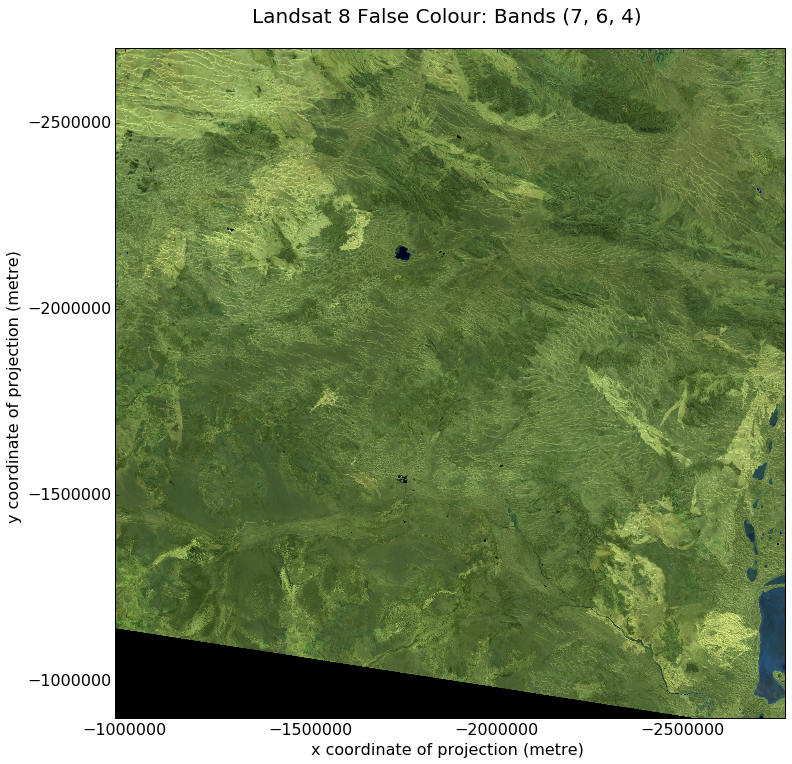

In [17]:
# Set figure size
plt.figure(figsize=(12,12))

# Plot image
plt.imshow(rgb, extent=[x_subset[0], y_subset[-1], x_subset[-1], y_subset[0]])

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title('Landsat 8 False Colour: Bands (7, 6, 4) \n', fontsize=20)
plt.xlabel(x.long_name+' ('+x.units+') ', fontsize=16)
plt.ylabel(y.long_name+' ('+y.units+') ', fontsize=16)


# Adjust tick mark size
plt.tick_params(labelsize=16)

#### Close file

In [21]:
f.close()

<div class="alert alert-info">
<b>EXTRA: </b> Add the "%%time" magic function to the beginning of cells and run through the above examples once for remote data access with the OPeNDAP Data URL and again for direct access on the file system. 
</div>

<a id='part7'></a>
## XArray package

XArray can be explained as the equivalent of pandas to multidimensional arrays and netCDF files.

**Note: To run XArray you'll need to load the following module (if you didn't already above)** 

    $ module load xarray/0.7.2-py2.7

### Open a NetCDF file an list the contents of the dataset

In [ ]:
import xarray as xr

In [14]:
ds = xr.open_dataset('/g/data2/rs0/datacube/002/LS8_OLI_NBART/-10_-28/LS8_OLI_NBART_3577_-10_-28_2013_v1493805443.nc')
print ds

<xarray.Dataset>
Dimensions:         (time: 61, x: 4000, y: 4000)
Coordinates:
  * y               (y) float64 -2.7e+06 -2.7e+06 -2.7e+06 -2.7e+06 -2.7e+06 ...
  * x               (x) float64 -1e+06 -1e+06 -9.999e+05 -9.999e+05 ...
  * time            (time) datetime64[ns] 2013-03-26T01:45:52.192524 ...
Data variables:
    crs             int32 -2147483647
    band_6          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_7          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_4          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_5          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_2          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_3          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    band_1          (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    extra_metadata  (time) |S30000 "acquisition:\n  groundstation: {code: 

### List the time dimension of the dataset
**Notice that dates are diaplayed as Python date objects as oposed to the netCDF package where they are seconds since 01-01-1970** 

In [15]:
ds.time

<xarray.DataArray 'time' (time: 61)>
array(['2013-03-26T12:45:52.192524000+1100',
       '2013-03-26T12:46:16.037281000+1100',
       '2013-03-31T12:42:01.626017000+1100',
       '2013-04-15T11:52:55.981080000+1000',
       '2013-04-15T11:53:19.924483000+1000',
       '2013-04-24T11:46:41.885828000+1000',
       '2013-04-24T11:47:05.840686000+1000',
       '2013-05-01T11:52:53.814662000+1000',
       '2013-05-01T11:53:17.770412000+1000',
       '2013-05-26T11:46:58.872204000+1000',
       '2013-05-26T11:47:22.816856000+1000',
       '2013-06-02T11:53:09.710001000+1000',
       '2013-06-02T11:53:33.651159000+1000',
       '2013-06-11T11:46:56.204865000+1000',
       '2013-06-11T11:47:20.146196000+1000',
       '2013-06-18T11:53:11.774828000+1000',
       '2013-06-18T11:53:27.224462000+1000',
       '2013-06-27T11:46:52.564954000+1000',
       '2013-06-27T11:47:16.502513000+1000',
       '2013-07-04T11:53:05.334759000+1000',
       '2013-07-04T11:53:29.277812000+1000',
       '2013-07-13

### Selecting a variable and slicing

#### Let's select the same time slice than in the previous example but specifying the specific date (it also )

In [28]:
ds.swir1.loc['2013-12-27T01:52:32.000000000'].shape

(4000, 4000)

### Plotting is a method of a data array

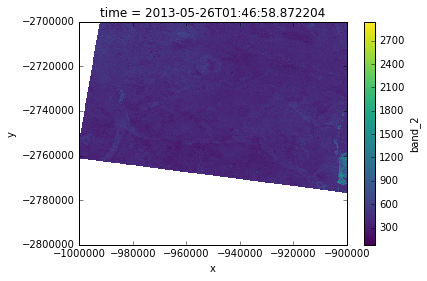

In [31]:
ds.swir1.loc['2013-12-27T01:52:32.000000000'].plot()

### Slicing using indexes in its natural units

#### Because XArray uses labeled arrays, we can use them to define subsets of the data using real values

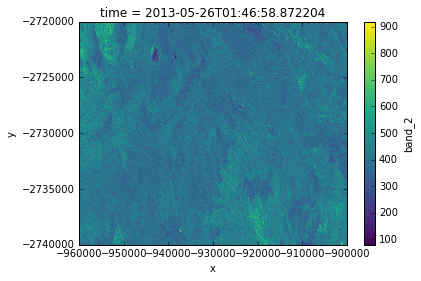

In [45]:
ds.band_2.loc['2013-05-26T11:46:58.872204000+1000', -2720000:-2740000, -960000:-94000].plot()